In [23]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

<h1>Regressão Linear<h1>

Daddos gerados de forma aleatória, abaixo temos um gráfico de dispersão dos pontos, logo em seguida geramos o modelo de regressão linear para esses pontos criando uma reta vermelha que melhor explique o comportamento desses dados, com isso conseguimos prever valores futuros.

$Y = \beta_0 + \beta_1*x_1 + \beta_1*x_1 + ... +  \beta_k*x_k + \epsilon$

$Y$: é a variavél a ser estimada <br>
$x_k$: Váriaveis explicativas <br>
$\beta_0$ : Coeficiente Linear <br>
$\beta_k$: Coeficientes Angular <br>
$\epsilon$: Erro de predição

<strong>Assuntos de Regressão Linear</strong>

<ol>
<li>Deve haver uma relação linear entre variáveis independentes e dependentes.</li>
<li>Não deve haver nenhum outliers presente.</li>
<li>Sem heterocedasticidade (variância não constante em torno da reta).</li>
<li>As observações da amostra devem ser independentes.</li>
<li>Os termos de erro devem ser normalmente distribuídos com média 0 e variância constante.</li>
<li>Ausência de multicolinearidade e autocorrelação.</li>
</ol>

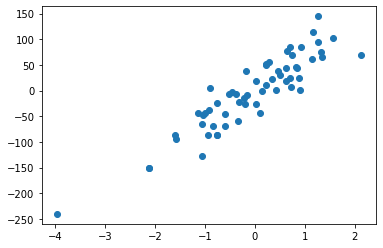

In [24]:
x, y = make_regression(n_samples=200, n_features=1, noise = 30)
x_treino, x_teste, y_treino, y_teste =train_test_split(x, y, test_size= 0.3)

plt.scatter(x_teste,y_teste)
plt.show()

In [25]:
modelo = LinearRegression()
modelo.fit(x_treino, y_treino)
resultado = modelo.score(x_teste, y_teste) # Coeficiente de determinação R quadrado da predição, 
# quanto mais próximo de 1 melhor

print(resultado)

0.8195061670401453


In [26]:
modelo.intercept_

1.1506462717610955

In [27]:
modelo.coef_

array([70.16149905])

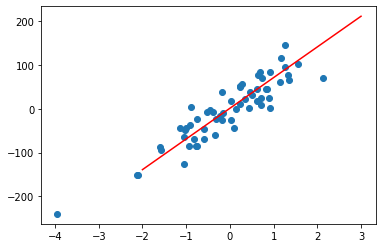

In [28]:
plt.scatter(x_teste,y_teste)
xreg = range(-2,4, 1)

plt.plot(xreg, modelo.intercept_ + xreg*modelo.coef_, color = 'red')
plt.show()

<h1>Regressão Linear para Dados Imobiliários<h1>

Foram coletados dados imobiliários que contém dados de casas vendidas da região de King County (USA) com o intuito de realizar uma regressão linear pra rever preços de casas.<br>
O modelo será treinado em 70% dos dados e para medir a performance será usado o Coeficiente de determinação $R^2$ da predição, quanto mais próximo de 1 seu valor, melhor o modelo terá de performance.

Link dos dados:  https://www.kaggle.com/harlfoxem/housesalesprediction

In [29]:
# Dados Imobiliarios dos EUA

df = pd.read_csv('kc_house_data.csv')

In [30]:
# Limpeza dos dados

df_house = (df.drop(['id', 'date', 'long', 'lat', 'zipcode'], axis='columns')).copy()

x = df_house.loc[:, df_house.columns != 'price']
y = df_house.loc[:, df_house.columns == 'price']

#y = df_house['price']
#x = df_house.drop(['price'], axis='columns')

# Separando dados em teste e treino
x_treino, x_teste, y_treino, y_teste =train_test_split(df_house.loc[:, df_house.columns != 'price'], 
                                                       df_house.loc[:, df_house.columns == 'price'], 
                                                       test_size= 0.3, random_state= 14)

Desconsideramos a variáveis <b>id</b>, <b>date</b>, <b>long</b>, <b>lat</b> e <b>zipcode</b> pois não são relevantes para explicar o modelo.

<ul>
<li>Id: Número Único de cada casa</li>
<li>Date: Data de Venda</li>
<li>Long: Longitude</li>
<li>Lat:Latitude</li>
<li>Zipcode: Código Zip (CEP)</li>
</ul>

In [31]:
modelo = LinearRegression()
modelo.fit(x_treino, y_treino) # Treinando modelo
resultado = modelo.score(x_teste, y_teste) # Coeficiente de determinação R quadrado da predição, quanto mais próximo de 
# 1 melhor, realizando nos dados de teste

print(resultado)

0.653809419628106


In [32]:
# Intercepto do modelo
modelo.intercept_

array([6371486.08883051])

In [33]:
# Coeficientes do modelo
modelo.coef_

array([[-3.93353980e+04,  4.64216263e+04,  1.12600642e+02,
        -4.98437603e-02,  2.52226669e+04,  6.23006309e+05,
         4.36406692e+04,  1.83637896e+04,  1.20503940e+05,
         5.70332101e+01,  5.55674320e+01, -3.65952762e+03,
         1.20704136e+01,  1.68241544e+01, -5.45409758e-01]])

O $R^2$ do modelo foi 0,66.

<h1>Métodos de Regularização<h1>

<h2>Ridge e Lasso<h2>

Métodos de regularização são utilizados em regressões lineares para melhorar a performance de um modelo adicionando uma função de penalidade na função de custo da regressão linear, no caso do Rige (L2) essa função é a soma dos quadrados dos coeficientes do modelo, já no Lasso (L1) é a soma do modulo desses coeficientes. <br>

Residual sum of squares (RSS) mede o quão bem a regressão linear performa com dados de treino:

$$RSS =  \sum_{i=1}^{n}(Y_i - \hat{Y_l})^2$$

Esta fórmula mede a exatidão da previsão do modelo para valores reais nos dados de treino. 
Se RSS = 0, o modelo prevê perfeitamente. No entanto, isso nem sempre é desejável, uma vez que pode indicar overffiting, 
especialmente se o conjunto de dados de treino for pequeno. A multicolinearidade pode ser uma das causas deste fato. <br>

Quando um ou mais coeficientes são demasiado elevados, o resultado do modelo torna-se sensível a pequenas alterações nos dados de entrada, podendo indicar overffiting. A regressão Ridge modifica a função de mínimos quadrados corrigindo os coeficientes de valor elevado introduzindo um termo de regularização na função RSS. Este termo de penalização é a soma dos quadrados dos coeficientes do modelo multiplicado por uma constante $\lambda$. 

$$RSS =  \sum_{i=1}^{n}(Y_i - \hat{Y_l})^2 + \lambda*\sum_{j=1}^{k}\beta_j^2$$

Na Regressão Lasso a função de penalização é definida como soma do modulos dos coeficientes do modelo multiplicado por uma constante $\lambda$. 

$$RSS =  \sum_{i=1}^{n}(Y_i - \hat{Y_l})^2 + \lambda*\sum_{j=1}^{k}|\beta_j|$$

In [34]:
from sklearn.linear_model import Ridge
modeloRidge = Ridge(alpha= 10) # alpha é lambda
modeloRidge.fit(x_treino, y_treino) # Treinando modelo
ResultadoRidge =  modeloRidge.score(x_teste, y_teste) 

print(ResultadoRidge)

0.6545037069731697


In [35]:
from sklearn.linear_model import Lasso
modeloLasso = Lasso(alpha= 500, max_iter= 5000, tol = 0.1) # alpha é lambda
modeloLasso.fit(x_treino, y_treino) # Treinando modelo
ResultadoLasso =  modeloLasso.score(x_teste, y_teste) 

print(ResultadoLasso)

0.6546240167941455


<h1>Elastic Net<h1>

Elastic net é a regressão que utiliza as duas formas de regularização, Ridge e Lasso e nela é possível definir um peso de
relevância para cada penalização com base no valor $c$ da formula:

$$RSS =  \sum_{i=1}^{n}(Y_i - \hat{Y_l})^2 + c*\sum_{j=1}^{k}|\beta_j| + (1-c)*\sum_{j=1}^{k}\beta_j^2$$

In [36]:
from sklearn.linear_model import ElasticNet
modeloElastic = ElasticNet(alpha= 1, l1_ratio= 0.9, tol = 0.3) # alpha é lambda
modeloElastic.fit(x_treino, y_treino) # Treinando modelo
ResultadoElastic =  modeloElastic.score(x_teste, y_teste) 

print(ResultadoElastic)

0.6312158728428808


In [37]:
def modelos_regressao (treino_x, teste_x, treino_y, teste_y):
    reg = LinearRegression()
    lasso = Lasso()
    ridge = Ridge()
    elastic = ElasticNet()

    reg.fit(treino_x, treino_y)
    lasso.fit(treino_x, treino_y)
    ridge.fit(treino_x, treino_y)
    reg.fit(treino_x, treino_y)
    lasso.fit(treino_x, treino_y)
    ridge.fit(treino_x, treino_y)
    elastic.fit(treino_x, treino_y)

    reg_score = reg.score(teste_x, teste_y) 
    lasso_score = lasso.score(teste_x, teste_y) 
    ridge_score = ridge.score(teste_x, teste_y) 
    elastic_score = elastic.score(teste_x, teste_y) 

    dic_models = {'Linear':reg_score , 'Lasso':lasso_score, 'Ridge':ridge_score, 'Elastic':elastic_score}

    print("Regressão Linear:", reg_score, "\nLasso:", lasso_score, "\nRidge:", ridge_score, "\nElastic Net:", elastic_score)
    print("O melhor modelo foi",max(dic_models, key = dic_models.get),"com valor", max(dic_models.values()))

In [38]:
modelos_regressao(x_treino, x_teste,y_treino, y_teste)

Regressão Linear: 0.653809419628106 
Lasso: 0.653811715690852 
Ridge: 0.6539029726255622 
Elastic Net: 0.6241134858939881
O melhor modelo foi Ridge com valor 0.6539029726255622


<h1>Admissão de Estudantes<h1>

In [39]:
df_adm = pd.read_csv('Admission_Predict.csv')

percen_faltantes= round((df_adm.isnull().sum() / len(df_adm['Chance of Admit ']) )*100, 2)

percen_faltantes

Serial No.           0.0
GRE Score            0.0
TOEFL Score          0.0
University Rating    0.0
SOP                  0.0
LOR                  0.0
CGPA                 0.0
Research             0.0
Chance of Admit      0.0
dtype: float64

In [40]:
# Limpeza dos dados

df_admiss = (df_adm.drop(['Serial No.'], axis='columns')).copy()

x_admiss = df_admiss.loc[:, df_admiss.columns != 'Chance of Admit ']
y_admiss = df_admiss.loc[:, df_admiss.columns == 'Chance of Admit ']

# Separando dados em teste e treino
x_treino, x_teste, y_treino, y_teste =train_test_split(x_admiss, 
                                                       y_admiss, 
                                                       test_size= 0.3, random_state= 14)

modelos_regressao(x_treino, x_teste, y_treino, y_teste)

Regressão Linear: 0.8074301329952366 
Lasso: 0.2880440026881922 
Ridge: 0.8086244883902469 
Elastic Net: 0.6153065342269577
O melhor modelo foi Ridge com valor 0.8086244883902469
